In [5]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
import json
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn import metrics
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier


import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets

from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression

In [8]:
import tensorflow as tf

In [9]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 10000

In [10]:
df = pd.read_csv('official_wz_update.csv', index_col = 0)

In [11]:
df1 = df.copy()

In [12]:
cl = []
for value in df1['playerStats.teamPlacement']:
    if value >= 1 and value <= 10:
        cl.append(1)
    elif value >= 11 and value <= 20:
        cl.append(2)
    elif value >= 21 and value <= 30:
        cl.append(3)
    elif value >= 31 and value <= 40:
        cl.append(4)
    else :
        cl.append(5)
        

In [13]:
df1['playerStats.teamPlacement'] = cl

In [16]:
reaction = df1.copy()

In [17]:
reaction.shape

(117084, 63)

In [18]:
X = reaction.copy().drop(columns = ['playerStats.teamPlacement'])
y = reaction.copy().pop('playerStats.teamPlacement')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y, test_size=0.3, random_state=1)

In [20]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline, make_union



In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', 
                          input_shape=(X_train.shape[1], )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 504       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
Total params: 792
Trainable params: 792
Non-trainable params: 0
_________________________________________________________________


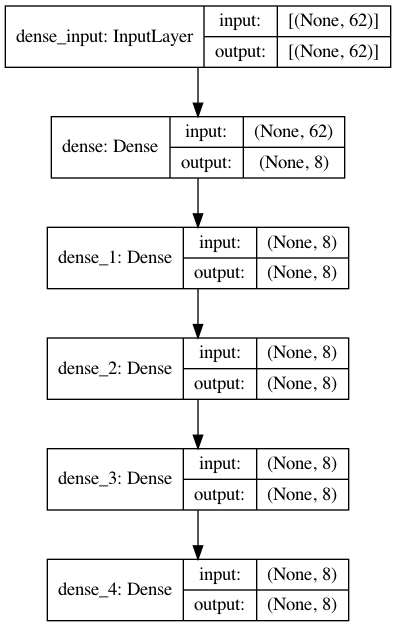

In [24]:
tf.keras.utils.plot_model(model, "classification_model.png", show_shapes=True)

In [25]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, 
                                              restore_best_weights=True)

EPOCHS = 1000

history = model.fit(
  X_train, y_train.values,
  epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop])

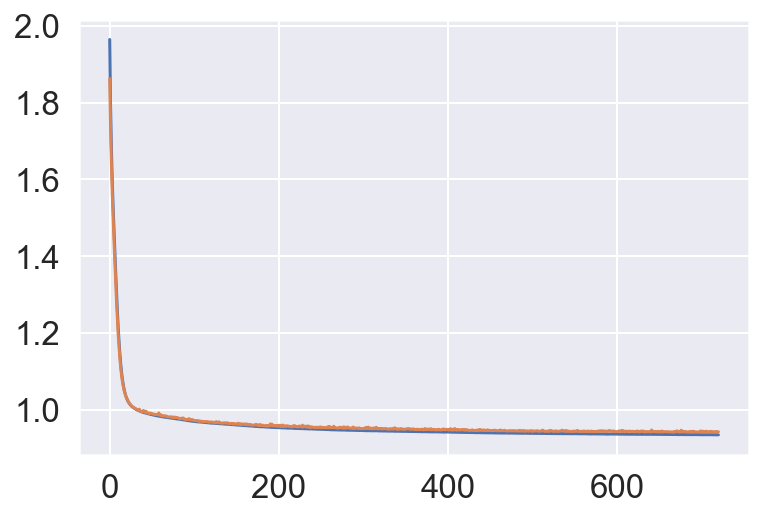

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [27]:
predictions = model.predict(X_test)

In [28]:
accuracy_score(y_test, predictions.argmax(axis=1))

0.6042247907532882

In [29]:
alpha = 0.001
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', 
                          input_shape=(X_train.shape[1], ), 
                          kernel_regularizer=tf.keras.regularizers.l2(alpha)),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(alpha)),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(alpha)),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(alpha)),
    tf.keras.layers.Dense(8, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(alpha))
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 504       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
Total params: 792
Trainable params: 792
Non-trainable params: 0
_________________________________________________________________


In [30]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, 
                                              restore_best_weights=True)

EPOCHS = 1000

history = model.fit(
  X_train, y_train.values,
  epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop])

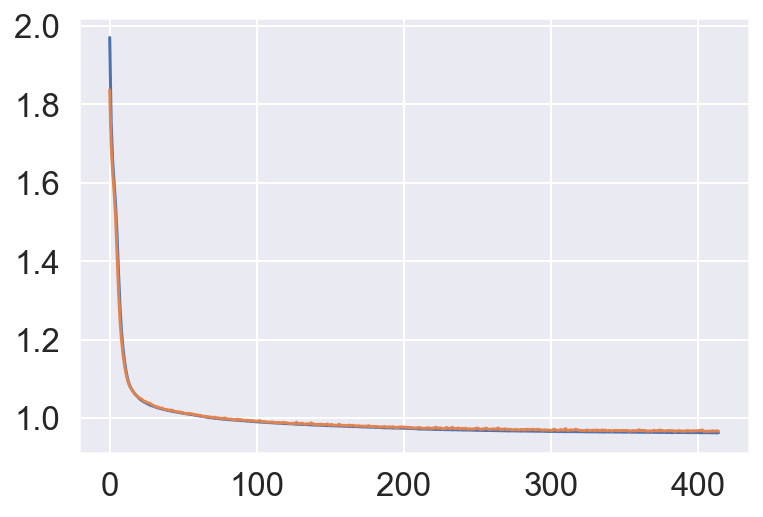

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [32]:
accuracy_score(y_test, predictions.argmax(axis=1))

0.6042247907532882

In [33]:
y_train

140001    3
135410    3
126687    3
86857     1
137354    4
         ..
101663    1
135821    1
12855     2
26547     1
93492     4
Name: playerStats.teamPlacement, Length: 81958, dtype: int64

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import precision_score



import scikitplot as skplt

In [35]:
predictions = model.predict(X_test)

In [36]:
probabilities_train = model.predict(X_train)
probabilities_test = model.predict(X_test)

In [37]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
print(classification_report(y_train, predictions_train.argmax(axis=1)))

              precision    recall  f1-score   support

           1       0.74      0.67      0.70     15750
           2       0.54      0.53      0.53     19052
           3       0.54      0.52      0.53     19771
           4       0.57      0.62      0.59     17047
           5       0.73      0.79      0.76     10338

    accuracy                           0.60     81958
   macro avg       0.62      0.63      0.62     81958
weighted avg       0.61      0.60      0.60     81958



In [40]:
predictions_train

array([[6.75847186e-05, 7.00739995e-02, 4.79711145e-01, ...,
        1.99836073e-03, 7.12945621e-05, 7.72718122e-05],
       [4.73300897e-05, 1.89743303e-02, 7.49188587e-02, ...,
        1.13705061e-02, 4.04534694e-05, 4.31299777e-05],
       [1.40952121e-04, 7.87190199e-02, 3.17335010e-01, ...,
        7.81324808e-04, 1.01960053e-04, 1.16164076e-04],
       ...,
       [1.78500215e-07, 4.79970098e-01, 4.89320427e-01, ...,
        1.89351127e-07, 1.50008361e-07, 2.18088189e-07],
       [1.01397131e-06, 7.69074261e-01, 2.21778512e-01, ...,
        9.15631801e-07, 8.51343430e-07, 1.22728682e-06],
       [2.13798063e-04, 1.32815205e-02, 7.02029616e-02, ...,
        7.10435212e-02, 2.14356129e-04, 2.09458478e-04]], dtype=float32)

In [41]:
from sklearn.datasets import make_classification

In [42]:
cm = confusion_matrix(y_test, predictions_test.argmax(axis=1))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

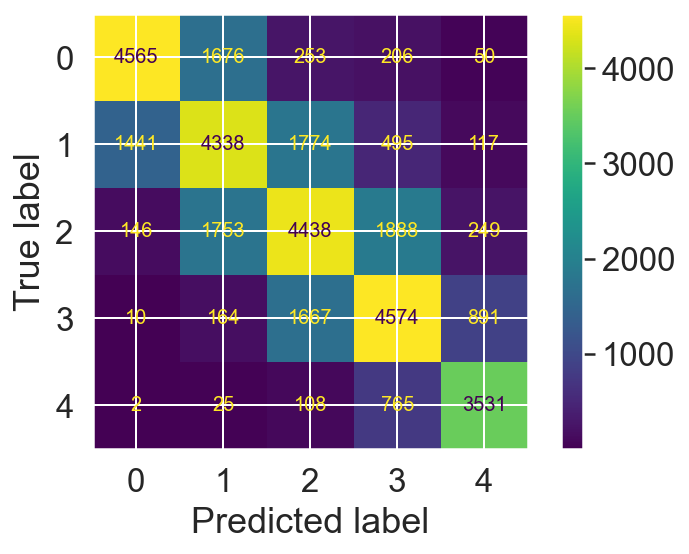

In [51]:
disp.plot()

In [43]:
cm1 = confusion_matrix(y_train, predictions_train.argmax(axis=1))


In [44]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)

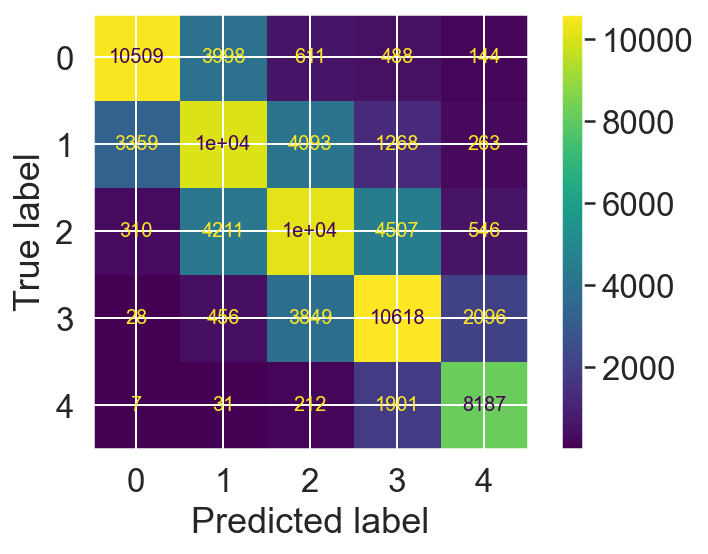

In [45]:
disp1.plot()